In [1]:
#1. import library
import os 
import numpy as np
import pandas as pd
from sklearn import datasets
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import StratifiedKFold as sk
from sklearn.tree import DecisionTreeClassifier as dt
from sklearn.metrics import accuracy_score as acs
from sklearn import tree
import time
import warnings
warnings.filterwarnings('ignore')


# Load data
data = pd.read_csv("cleaneddata.csv")

# Split the data into features (X) and target (y)
# Assuming 'Condition' is the target column and the rest are features
X = data.drop(columns=['Condition'])  # Features
y = data['Condition']  # Target

# Convert X and y to DataFrames
X = pd.DataFrame(X)
y = pd.DataFrame(y)

# Print the length of the data
print("Data length:", len(y))




Data length: 116


In [3]:
# create save path
path = os.getcwd()
savePath = path + '/decision_tree_results/'
print(savePath)

C:\Users\Jason/decision_tree_results/


Training data length: 87
Verification data length: 29
Accuracy: 0.8621
Classification Report:
               precision    recall  f1-score   support

  Condition1       0.75      0.50      0.60         6
  Condition3       1.00      1.00      1.00        10
     Normal1       0.80      0.92      0.86        13

    accuracy                           0.86        29
   macro avg       0.85      0.81      0.82        29
weighted avg       0.86      0.86      0.85        29

Training data length: 87
Verification data length: 29
Accuracy: 0.8966
Classification Report:
               precision    recall  f1-score   support

  Condition1       1.00      0.50      0.67         6
  Condition3       1.00      1.00      1.00        10
     Normal1       0.81      1.00      0.90        13

    accuracy                           0.90        29
   macro avg       0.94      0.83      0.85        29
weighted avg       0.92      0.90      0.88        29

Training data length: 87
Verification data lengt

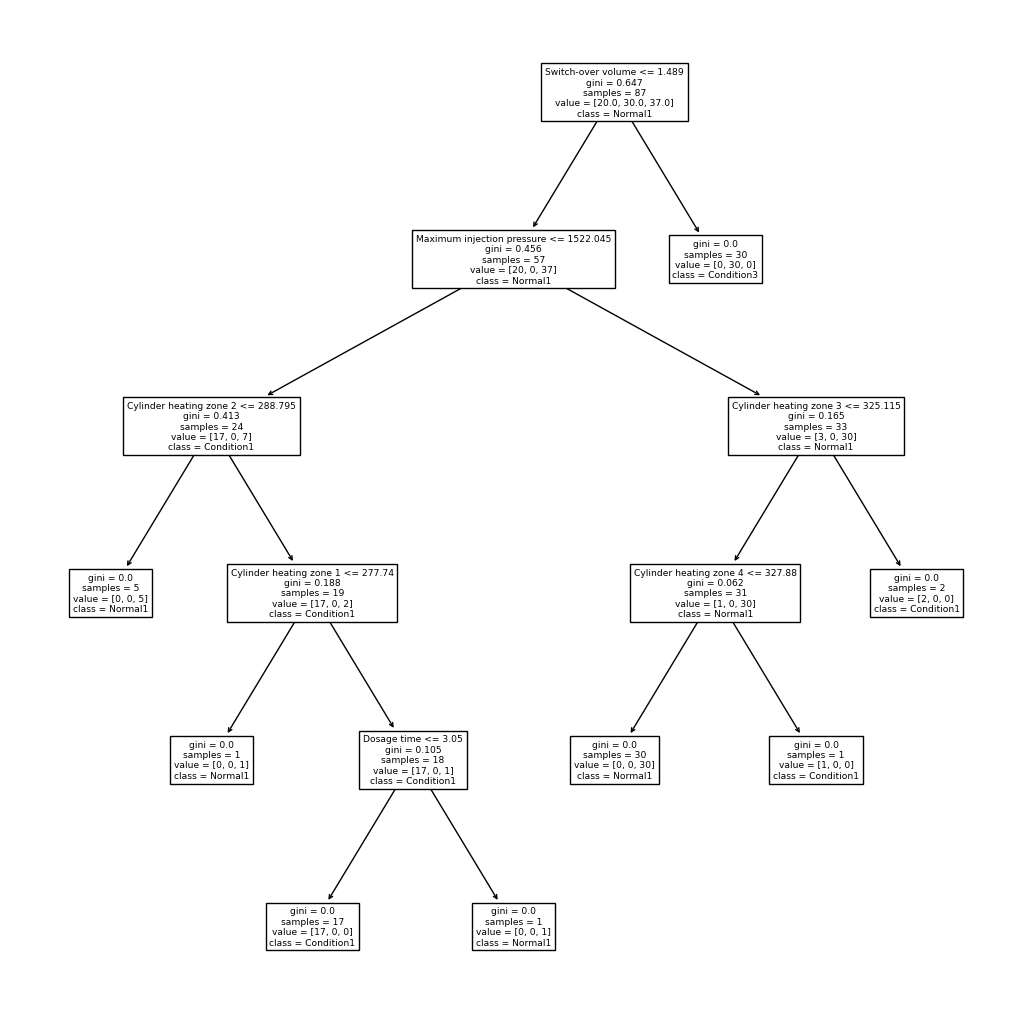

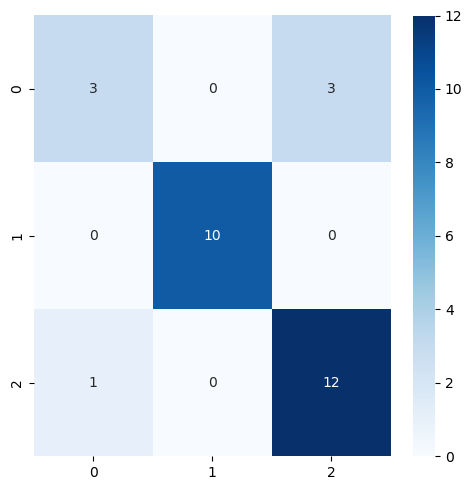

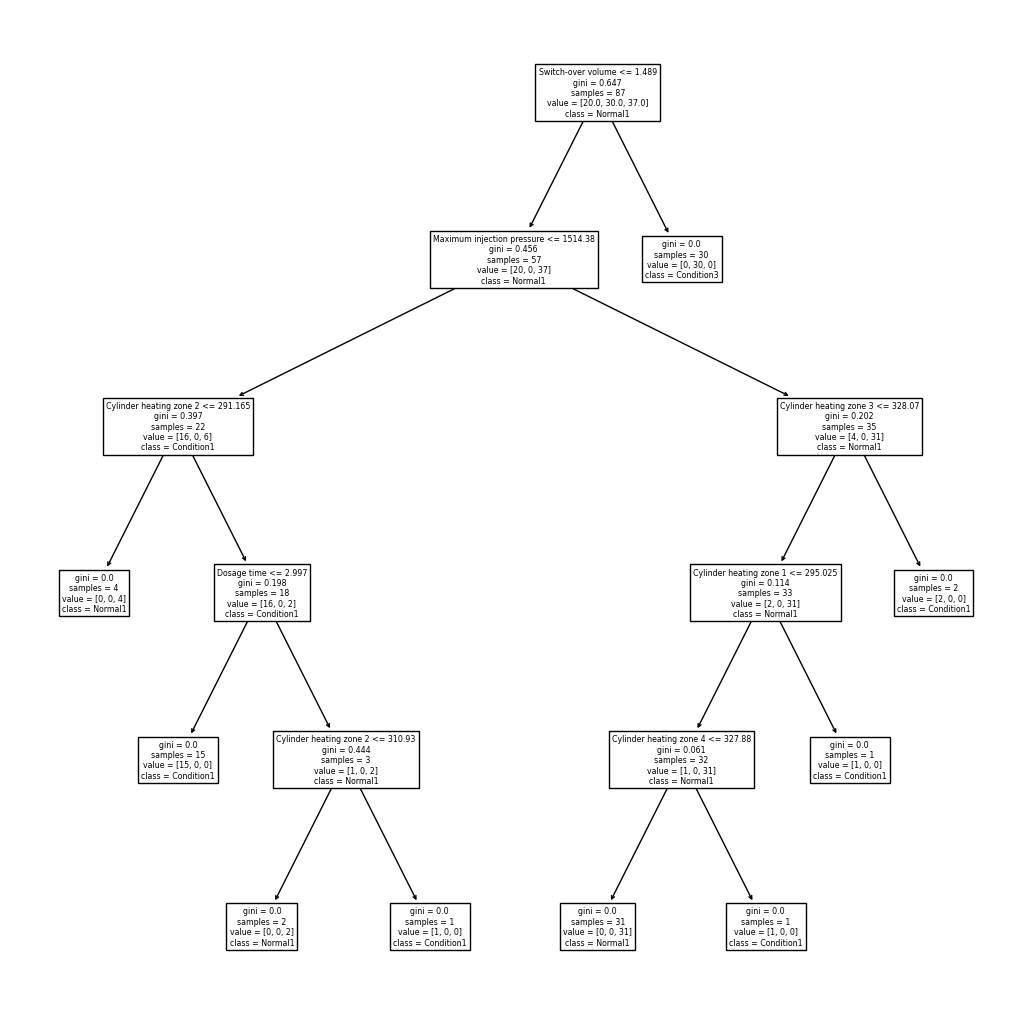

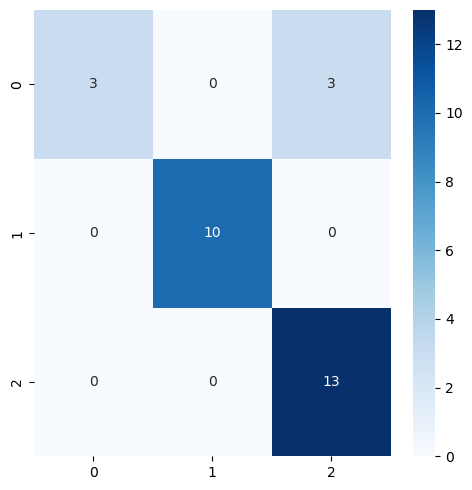

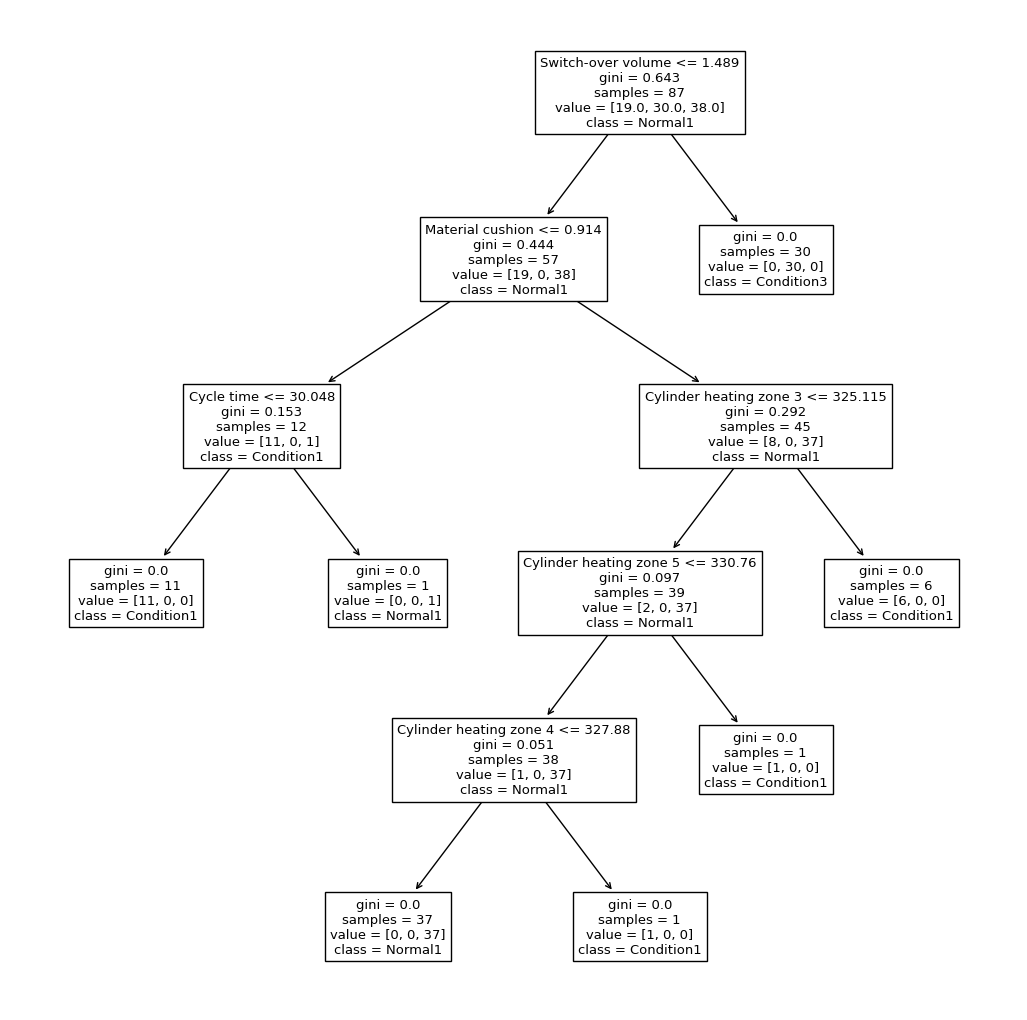

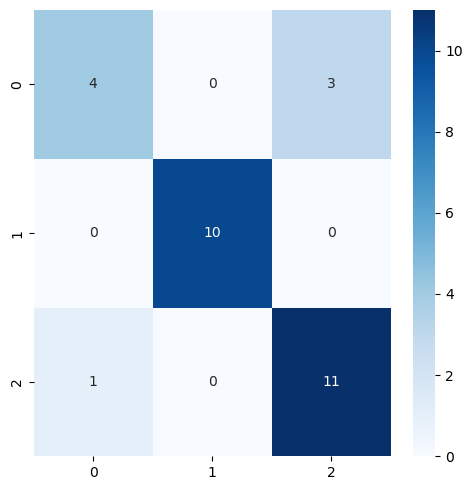

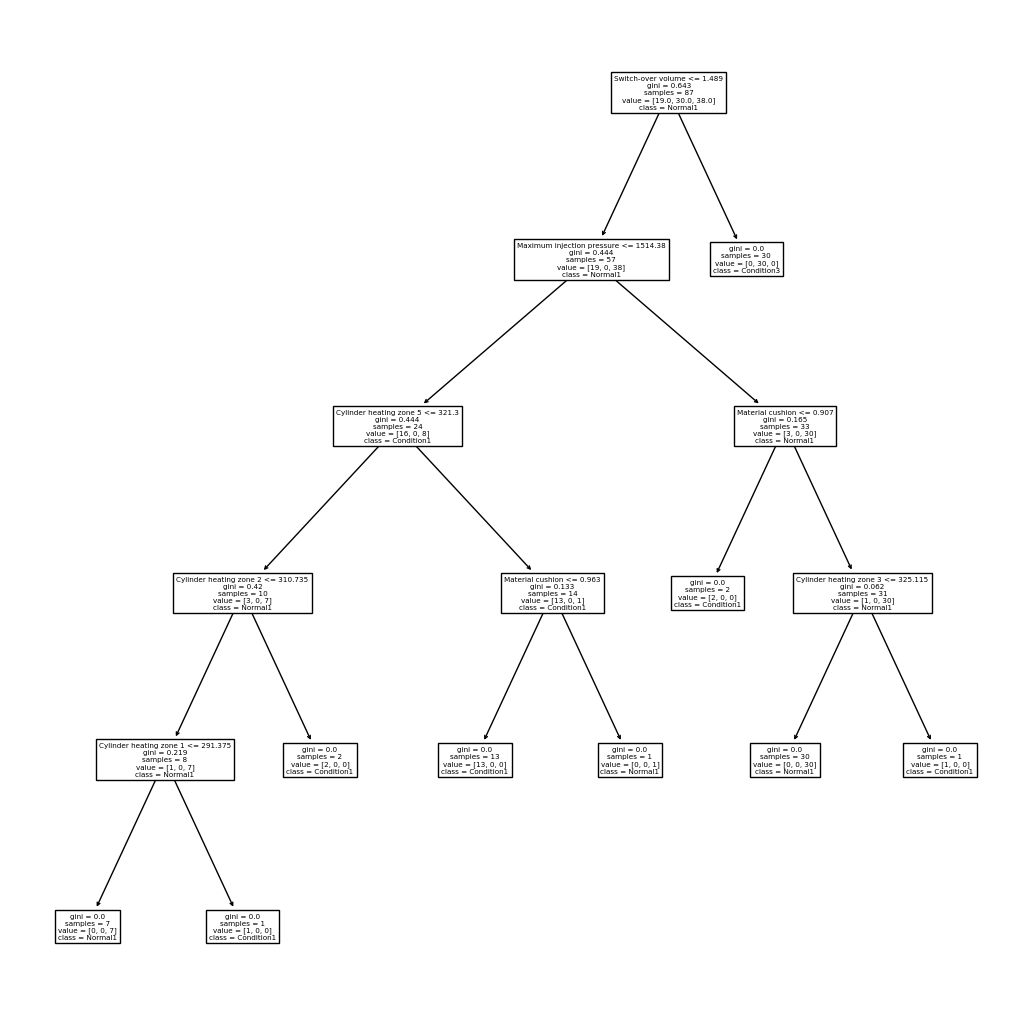

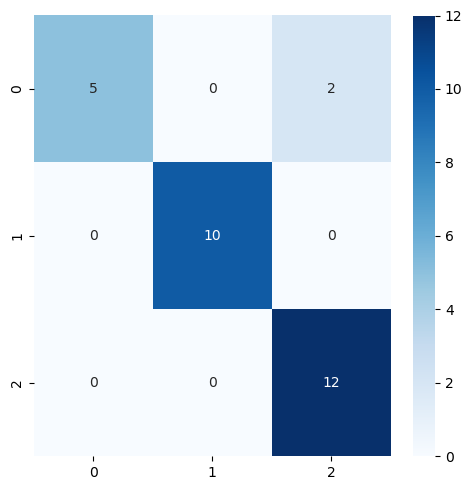

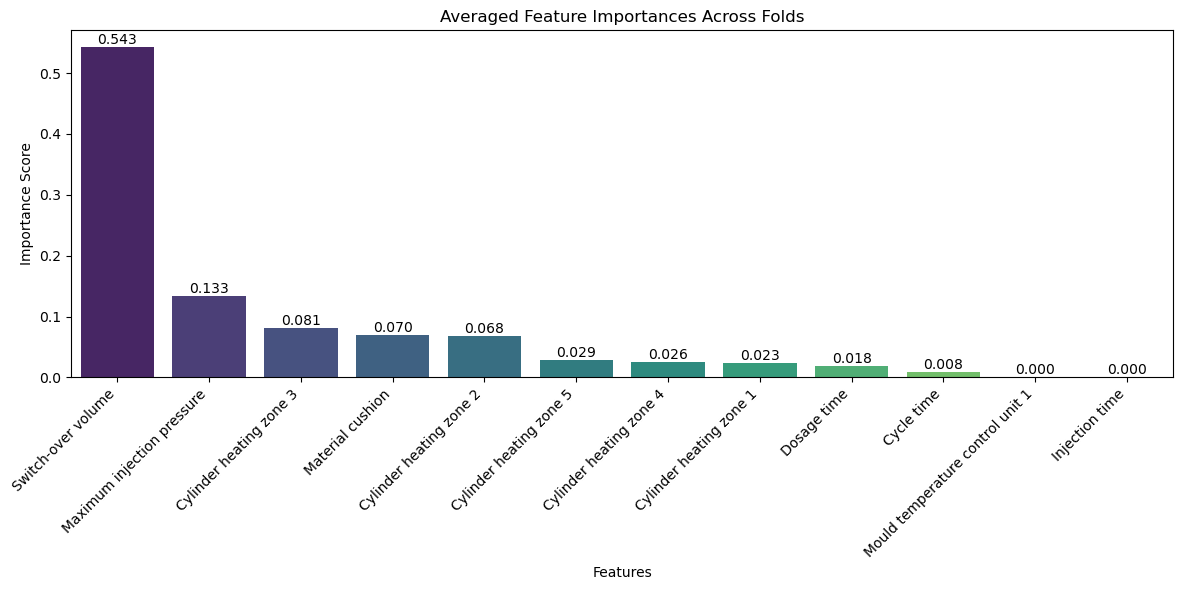

Average accuracy across folds: 0.8879


In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import StratifiedKFold as sk
from sklearn.tree import DecisionTreeClassifier as dt
from sklearn.metrics import accuracy_score as acs, confusion_matrix, classification_report
from sklearn import tree

# Load your data (X and y) from previous step
# Assuming X and y have already been split from the dataset

# Define decision model
model_name = 'Decision Tree'
model2 = dt(random_state=0)

# Split data into 3/4 for training and 1/4 for testing using StratifiedKFold
cv = sk(n_splits=4, shuffle=True, random_state=0)

# Accuracy list
accuracy_l = []
# Result list
result_matrix = []

# List to store feature importances from each fold
all_importances = []

# Define a save path for results (ensure the directory exists)
savePath = r"C:\path\to\save\results"

# Ensure the directory exists, if not, create it
if not os.path.exists(savePath):
    os.makedirs(savePath)

# Perform cross-validation
for tr_i, te_i in cv.split(X, y):
    X_tr = X.iloc[tr_i]
    X_v = X.iloc[te_i]
    y_tr = y.iloc[tr_i]
    y_v = y.iloc[te_i]
    
    print("Training data length:", len(y_tr))
    print("Verification data length:", len(y_v))
    
    # Fit decision tree model and predict
    model2.fit(X_tr, y_tr)
    y_p = model2.predict(X_v)
    
    # Calculate accuracy
    accuracy = np.mean(acs(y_v, y_p))
    print("Accuracy:", accuracy.round(4))
    accuracy_l.append(accuracy)
    
    # Display classification report
    print("Classification Report:\n", classification_report(y_v, y_p))
    
    # Plot and save Decision tree 
    fig = plt.figure(figsize=(13, 13))
    tree.plot_tree(model2, feature_names=X.columns, class_names=model2.classes_, filled=False)
    plt.savefig(os.path.join(savePath, 'decision_tree_' + str(len(accuracy_l)) + '.png'))
    
    # Use confusion matrix to compare y_v and y_p, plot and save confusion matrix
    fig, ax = plt.subplots(figsize=(5, 5))
    ax = sns.heatmap(confusion_matrix(y_v, y_p), annot=True, fmt='d', cmap='Blues')
    plt.tight_layout()
    plt.savefig(os.path.join(savePath, 'confusion_matrix_' + str(len(accuracy_l)) + '.png'))
    
    # Reset the label to original and save the original test data + prediction into a .csv file
    X_v.reset_index(drop=True, inplace=True)
    y_v.reset_index(drop=True, inplace=True)
    
    # Create result matrix with features, actual values, and predictions
    result_matrix = pd.concat([X_v, y_v], axis=1)
    result_matrix['Prediction'] = y_p  # Add predictions as a new column
    result_matrix.to_csv(os.path.join(savePath, 'cv_results_' + str(len(accuracy_l)) + '.csv'), index=False)

    # Store feature importances for this fold
    all_importances.append(model2.feature_importances_)

# Average the importances across folds
avg_importances = np.mean(all_importances, axis=0)

# Create DataFrame for averaged importances
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': avg_importances
})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot with features on the x-axis and importance on the y-axis for a vertical bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='Feature', y='Importance', data=importance_df, palette='viridis')
plt.title("Averaged Feature Importances Across Folds")
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.xticks(rotation=45, ha='right')  # Rotate feature names for better readability
plt.tight_layout()

# Add value labels on bars
for index, value in enumerate(importance_df['Importance']):
    plt.text(index, value, f"{value:.3f}", ha='center', va='bottom')

# Save the bar chart
plt.savefig(os.path.join(savePath, 'averaged_feature_importances.png'))
plt.show()

# Print final accuracy statistics
print("Average accuracy across folds:", np.mean(accuracy_l).round(4))


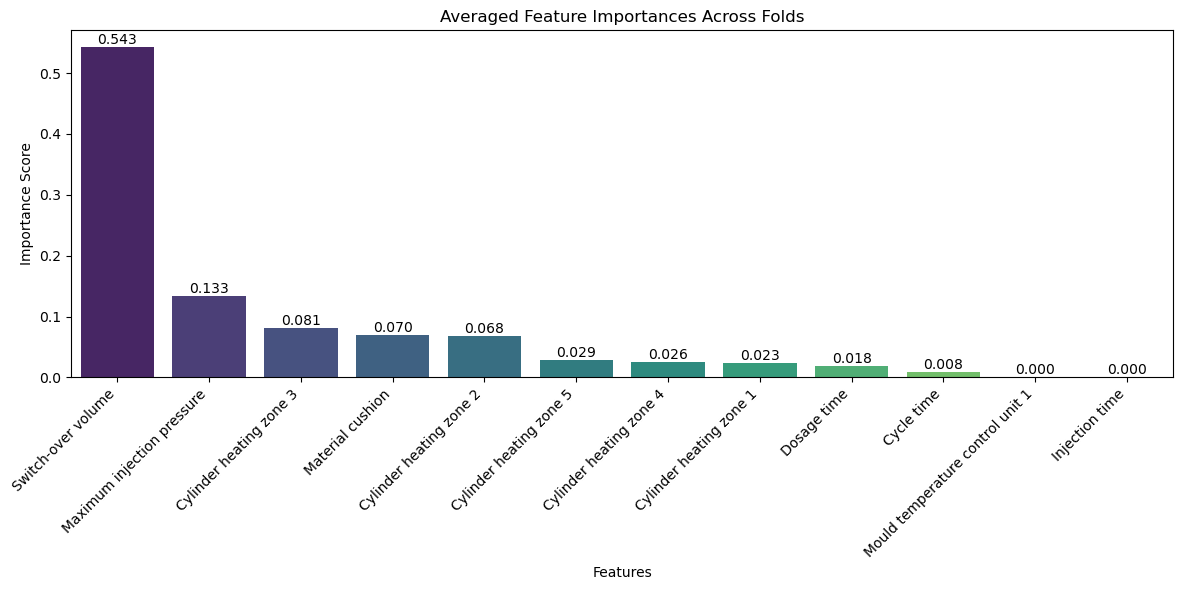

Number of selected features based on importance: 5
Selected features based on importance: ['Switch-over volume', 'Maximum injection pressure', 'Cylinder heating zone 3', 'Material cushion', 'Cylinder heating zone 2']
Accuracy on selected features for fold 1: 0.931
Classification Report for fold 1:
               precision    recall  f1-score   support

  Condition1       0.83      0.83      0.83         6
  Condition3       1.00      1.00      1.00        10
     Normal1       0.92      0.92      0.92        13

    accuracy                           0.93        29
   macro avg       0.92      0.92      0.92        29
weighted avg       0.93      0.93      0.93        29



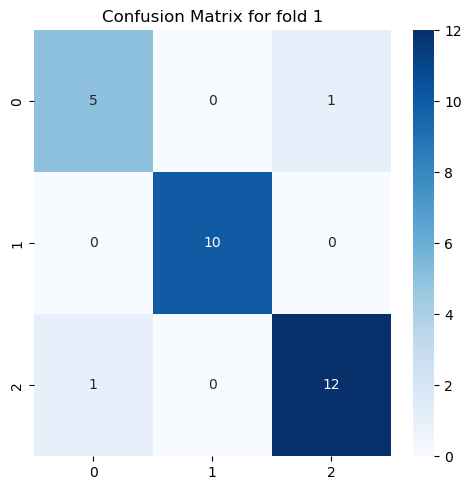

Accuracy on selected features for fold 2: 0.8276
Classification Report for fold 2:
               precision    recall  f1-score   support

  Condition1       0.67      0.33      0.44         6
  Condition3       1.00      1.00      1.00        10
     Normal1       0.75      0.92      0.83        13

    accuracy                           0.83        29
   macro avg       0.81      0.75      0.76        29
weighted avg       0.82      0.83      0.81        29



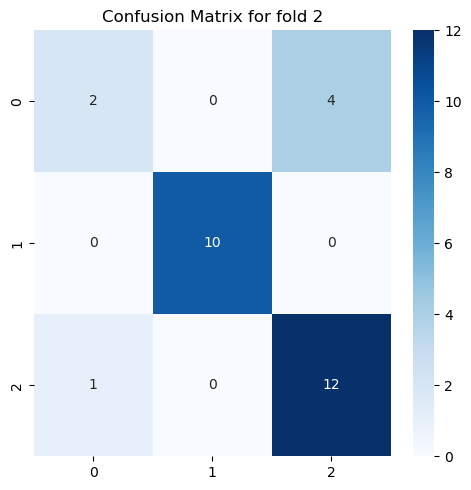

Accuracy on selected features for fold 3: 0.7586
Classification Report for fold 3:
               precision    recall  f1-score   support

  Condition1       0.50      0.71      0.59         7
  Condition3       1.00      1.00      1.00        10
     Normal1       0.78      0.58      0.67        12

    accuracy                           0.76        29
   macro avg       0.76      0.77      0.75        29
weighted avg       0.79      0.76      0.76        29



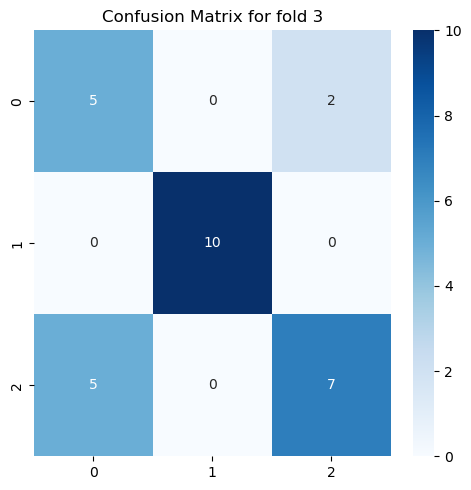

Accuracy on selected features for fold 4: 0.9655
Classification Report for fold 4:
               precision    recall  f1-score   support

  Condition1       1.00      0.86      0.92         7
  Condition3       1.00      1.00      1.00        10
     Normal1       0.92      1.00      0.96        12

    accuracy                           0.97        29
   macro avg       0.97      0.95      0.96        29
weighted avg       0.97      0.97      0.96        29



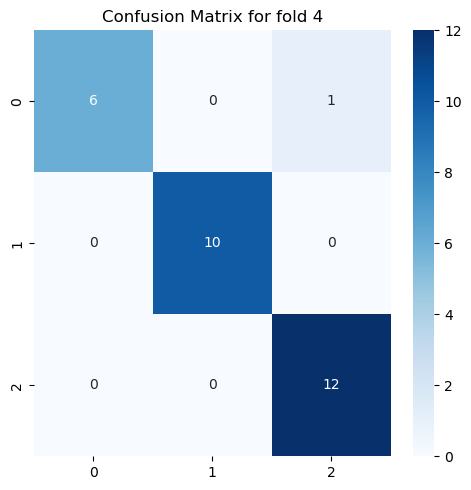

Average accuracy on selected features across folds: 0.8707


In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import StratifiedKFold as sk
from sklearn.tree import DecisionTreeClassifier as dt
from sklearn.metrics import accuracy_score as acs, confusion_matrix, classification_report
from sklearn import tree

# Load your data (X and y) from previous step
# Assuming X and y have already been split from the dataset

# Define decision model
model_name = 'Decision Tree'
model2 = dt(random_state=0)

# Split data into 3/4 for training and 1/4 for testing using StratifiedKFold
cv = sk(n_splits=4, shuffle=True, random_state=0)

# Accuracy list for selected features
accuracy_l_selected = []

# List to store feature importances from each fold
all_importances = []

# Define a save path for results (ensure the directory exists)
savePath = r"C:\path\to\save\results"

# Ensure the directory exists, if not, create it
if not os.path.exists(savePath):
    os.makedirs(savePath)

# Perform cross-validation to calculate feature importance across all folds
for tr_i, te_i in cv.split(X, y):
    X_tr = X.iloc[tr_i]
    X_v = X.iloc[te_i]
    y_tr = y.iloc[tr_i]
    y_v = y.iloc[te_i]
    
    # Fit decision tree model and predict
    model2.fit(X_tr, y_tr)
    
    # Store feature importances for this fold
    all_importances.append(model2.feature_importances_)

# Average the importances across folds
avg_importances = np.mean(all_importances, axis=0)

# Create DataFrame for averaged importances
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': avg_importances
})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot with features on the x-axis and importance on the y-axis for a vertical bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='Feature', y='Importance', data=importance_df, palette='viridis')
plt.title("Averaged Feature Importances Across Folds")
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.xticks(rotation=45, ha='right')  # Rotate feature names for better readability
plt.tight_layout()

# Add value labels on bars
for index, value in enumerate(importance_df['Importance']):
    plt.text(index, value, f"{value:.3f}", ha='center', va='bottom')

# Save the bar chart
plt.savefig(os.path.join(savePath, 'averaged_feature_importances.png'))
plt.show()

# Auto-select features with importance > 0.05 (you can change this threshold as needed)
selected_features = importance_df[importance_df['Importance'] > 0.05]['Feature'].tolist()

# Print the number of selected features
print(f"Number of selected features based on importance: {len(selected_features)}")
print("Selected features based on importance:", selected_features)

# Train the model with the selected features
for fold, (tr_i, te_i) in enumerate(cv.split(X[selected_features], y), 1):
    X_tr = X[selected_features].iloc[tr_i]
    X_v = X[selected_features].iloc[te_i]
    y_tr = y.iloc[tr_i]
    y_v = y.iloc[te_i]
    
    # Fit decision tree model and predict
    model2.fit(X_tr, y_tr)
    y_p = model2.predict(X_v)
    
    # Calculate accuracy
    accuracy = np.mean(acs(y_v, y_p))
    print(f"Accuracy on selected features for fold {fold}:", accuracy.round(4))
    accuracy_l_selected.append(accuracy)
    
    # Display classification report
    print(f"Classification Report for fold {fold}:\n", classification_report(y_v, y_p))
    
    # Use confusion matrix to compare y_v and y_p, plot and save confusion matrix
    fig, ax = plt.subplots(figsize=(5, 5))
    ax = sns.heatmap(confusion_matrix(y_v, y_p), annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for fold {fold}')
    plt.tight_layout()
    plt.savefig(os.path.join(savePath, f'confusion_matrix_selected_{fold}.png'))
    plt.show()

# Print final accuracy statistics for selected features
print("Average accuracy on selected features across folds:", np.mean(accuracy_l_selected).round(4))


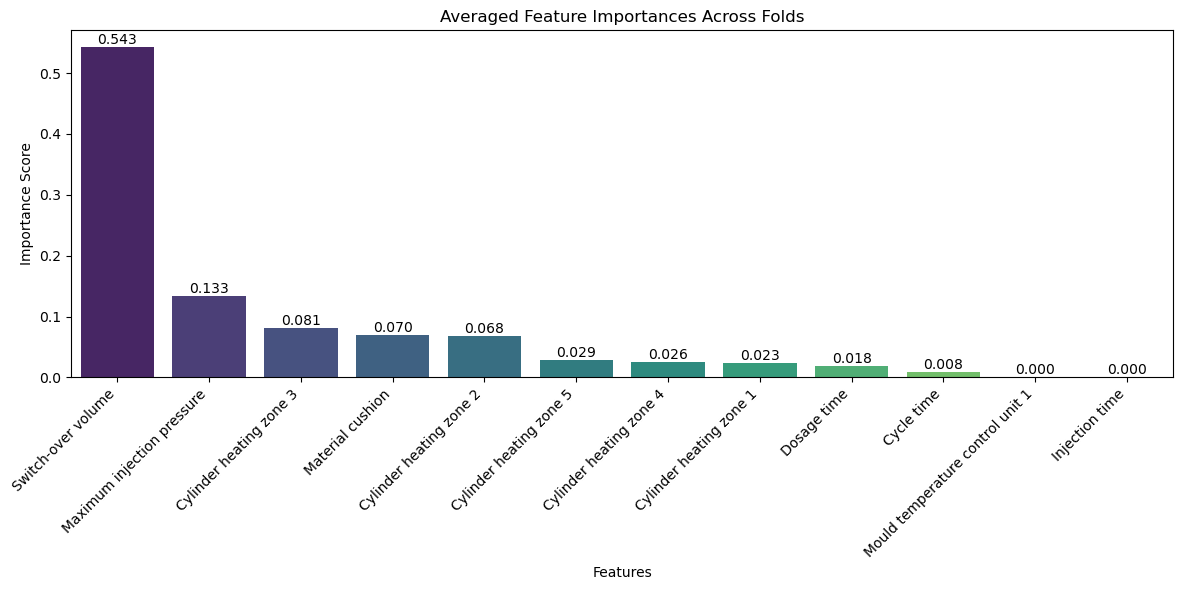

Number of selected features based on importance: 5
Selected features based on importance: ['Switch-over volume', 'Maximum injection pressure', 'Cylinder heating zone 3', 'Material cushion', 'Cylinder heating zone 2']
Fitting 4 folds for each of 2736 candidates, totalling 10944 fits
GridSearchCV execution time: 51.78 seconds
Best Hyperparameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2}
Accuracy for fold 1: 0.9655
Classification Report for fold 1:
               precision    recall  f1-score   support

  Condition1       1.00      0.83      0.91         6
  Condition3       1.00      1.00      1.00        10
     Normal1       0.93      1.00      0.96        13

    accuracy                           0.97        29
   macro avg       0.98      0.94      0.96        29
weighted avg       0.97      0.97      0.96        29



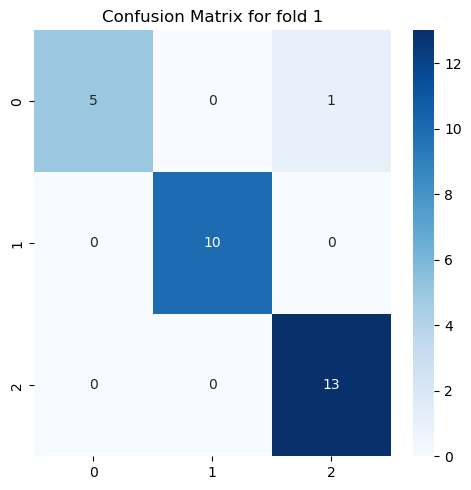

Accuracy for fold 2: 0.8966
Classification Report for fold 2:
               precision    recall  f1-score   support

  Condition1       0.80      0.67      0.73         6
  Condition3       1.00      1.00      1.00        10
     Normal1       0.86      0.92      0.89        13

    accuracy                           0.90        29
   macro avg       0.89      0.86      0.87        29
weighted avg       0.89      0.90      0.89        29



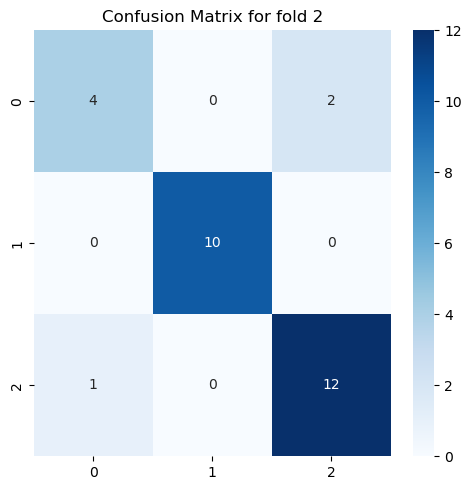

Accuracy for fold 3: 0.8276
Classification Report for fold 3:
               precision    recall  f1-score   support

  Condition1       0.62      0.71      0.67         7
  Condition3       1.00      1.00      1.00        10
     Normal1       0.82      0.75      0.78        12

    accuracy                           0.83        29
   macro avg       0.81      0.82      0.82        29
weighted avg       0.83      0.83      0.83        29



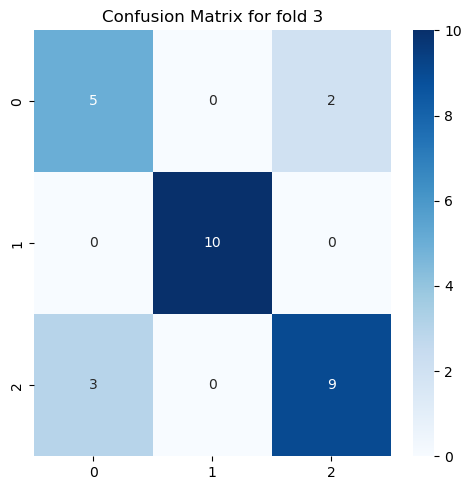

Accuracy for fold 4: 0.9655
Classification Report for fold 4:
               precision    recall  f1-score   support

  Condition1       1.00      0.86      0.92         7
  Condition3       1.00      1.00      1.00        10
     Normal1       0.92      1.00      0.96        12

    accuracy                           0.97        29
   macro avg       0.97      0.95      0.96        29
weighted avg       0.97      0.97      0.96        29



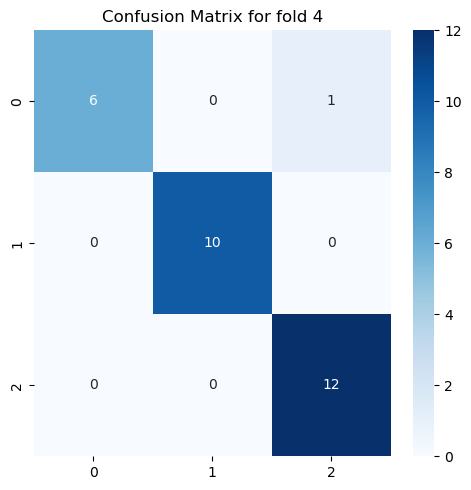

Average accuracy across folds: 0.9138


In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import time
from sklearn.model_selection import StratifiedKFold as sk, GridSearchCV
from sklearn.tree import DecisionTreeClassifier as dt
from sklearn.metrics import accuracy_score as acs, confusion_matrix, classification_report
from sklearn import tree

# Load your data (X and y) from previous step
# Assuming X and y have already been split from the dataset

# Define decision model
model_name = 'Decision Tree'
model2 = dt(random_state=0)

# Split data into 3/4 for training and 1/4 for testing using StratifiedKFold
cv = sk(n_splits=4, shuffle=True, random_state=0)

# Accuracy list for selected features
accuracy_l_selected = []

# List to store feature importances from each fold
all_importances = []

# Define a save path for results (ensure the directory exists)
savePath = r"C:\path\to\save\results"

# Ensure the directory exists, if not, create it
if not os.path.exists(savePath):
    os.makedirs(savePath)

# Perform cross-validation to calculate feature importance across all folds
for tr_i, te_i in cv.split(X, y):
    X_tr = X.iloc[tr_i]
    X_v = X.iloc[te_i]
    y_tr = y.iloc[tr_i]
    y_v = y.iloc[te_i]
    
    # Fit decision tree model and predict
    model2.fit(X_tr, y_tr)
    
    # Store feature importances for this fold
    all_importances.append(model2.feature_importances_)

# Average the importances across folds
avg_importances = np.mean(all_importances, axis=0)

# Create DataFrame for averaged importances
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': avg_importances
})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot with features on the x-axis and importance on the y-axis for a vertical bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='Feature', y='Importance', data=importance_df, palette='viridis')
plt.title("Averaged Feature Importances Across Folds")
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.xticks(rotation=45, ha='right')  # Rotate feature names for better readability
plt.tight_layout()

# Add value labels on bars
for index, value in enumerate(importance_df['Importance']):
    plt.text(index, value, f"{value:.3f}", ha='center', va='bottom')

# Save the bar chart
plt.savefig(os.path.join(savePath, 'averaged_feature_importances.png'))
plt.show()

# Auto-select features with importance > 0.05 (you can change this threshold as needed)
selected_features = importance_df[importance_df['Importance'] > 0.05]['Feature'].tolist()

# Print the number of selected features
print(f"Number of selected features based on importance: {len(selected_features)}")
print("Selected features based on importance:", selected_features)

# Define hyperparameter grid for tuning
model_params = {
    "criterion": ['gini', 'entropy'],
    "max_depth": range(1, 20),
    "min_samples_split": range(2, 10),  # Starting from 2 as 1 would result in no splitting
    "min_samples_leaf": range(1, 10)
}

# Start timing the process
start_time = time.time()

# Perform GridSearchCV with the selected features
grid_search = GridSearchCV(estimator=model2, param_grid=model_params, cv=cv, n_jobs=-1, verbose=1)
grid_search.fit(X[selected_features], y)

# End timing the process
end_time = time.time()
execution_time = end_time - start_time
print(f"GridSearchCV execution time: {execution_time:.2f} seconds")

# Best hyperparameters from GridSearchCV
print(f"Best Hyperparameters: {grid_search.best_params_}")

# Train the model with the best parameters and evaluate performance
best_model = grid_search.best_estimator_

# Initialize list to track accuracy for each fold
accuracy_l_selected = []

# Perform cross-validation with the best model and selected features
for fold, (tr_i, te_i) in enumerate(cv.split(X[selected_features], y), 1):
    X_tr = X[selected_features].iloc[tr_i]
    X_v = X[selected_features].iloc[te_i]
    y_tr = y.iloc[tr_i]
    y_v = y.iloc[te_i]
    
    # Fit decision tree model and predict
    best_model.fit(X_tr, y_tr)
    y_p = best_model.predict(X_v)
    
    # Calculate accuracy
    accuracy = np.mean(acs(y_v, y_p))
    print(f"Accuracy for fold {fold}: {accuracy.round(4)}")
    accuracy_l_selected.append(accuracy)
    
    # Display classification report
    print(f"Classification Report for fold {fold}:\n", classification_report(y_v, y_p))
    
    # Use confusion matrix to compare y_v and y_p, plot and save confusion matrix
    fig, ax = plt.subplots(figsize=(5, 5))
    ax = sns.heatmap(confusion_matrix(y_v, y_p), annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for fold {fold}')
    plt.tight_layout()
    plt.savefig(os.path.join(savePath, f'confusion_matrix_selected_{fold}.png'))
    plt.show()

# Print final accuracy statistics across folds
mean_accuracy = np.mean(accuracy_l_selected)
print("Average accuracy across folds:", mean_accuracy.round(4))


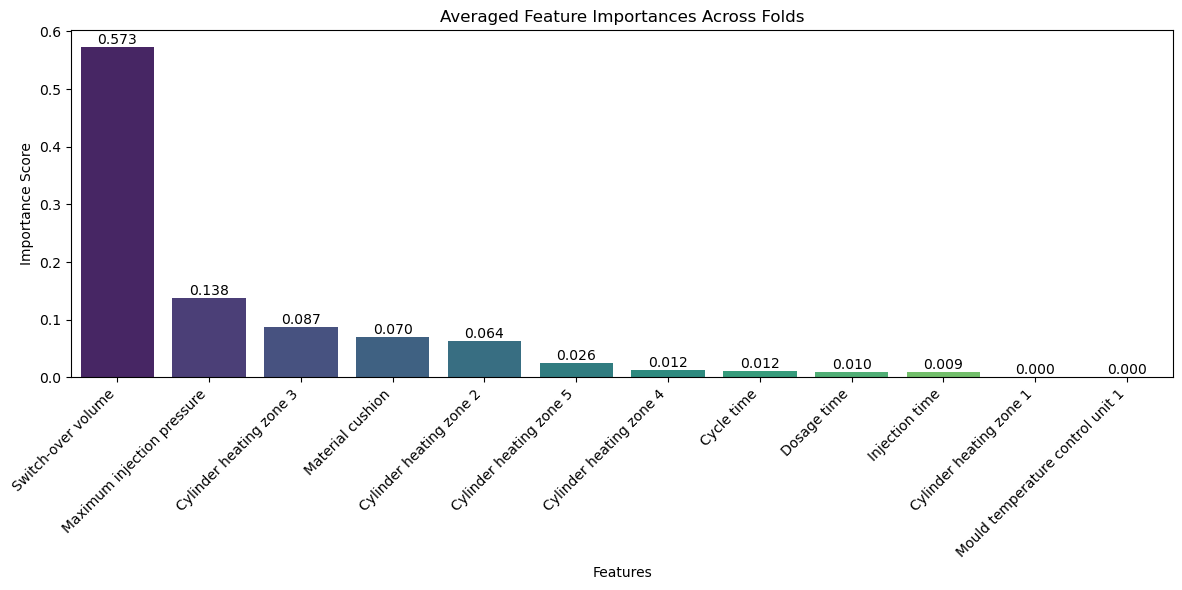

Number of selected features based on importance: 5
Selected features based on importance: ['Switch-over volume', 'Maximum injection pressure', 'Cylinder heating zone 3', 'Material cushion', 'Cylinder heating zone 2']
Accuracy for fold 1: 0.9655
Classification Report for fold 1:
               precision    recall  f1-score   support

  Condition1       1.00      0.83      0.91         6
  Condition3       1.00      1.00      1.00        10
     Normal1       0.93      1.00      0.96        13

    accuracy                           0.97        29
   macro avg       0.98      0.94      0.96        29
weighted avg       0.97      0.97      0.96        29



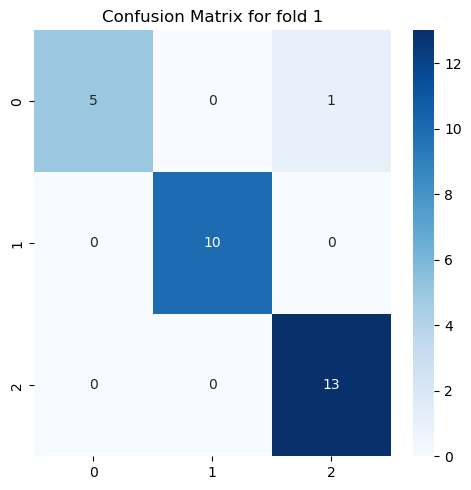

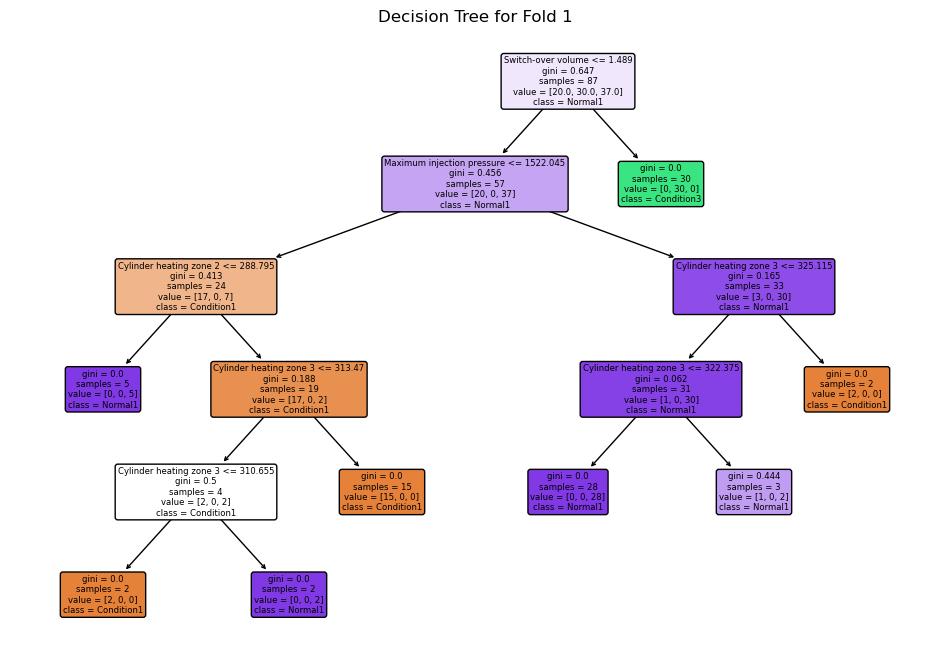

Accuracy for fold 2: 0.8966
Classification Report for fold 2:
               precision    recall  f1-score   support

  Condition1       0.80      0.67      0.73         6
  Condition3       1.00      1.00      1.00        10
     Normal1       0.86      0.92      0.89        13

    accuracy                           0.90        29
   macro avg       0.89      0.86      0.87        29
weighted avg       0.89      0.90      0.89        29



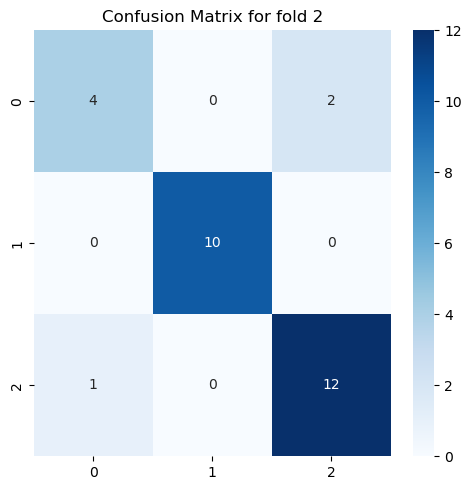

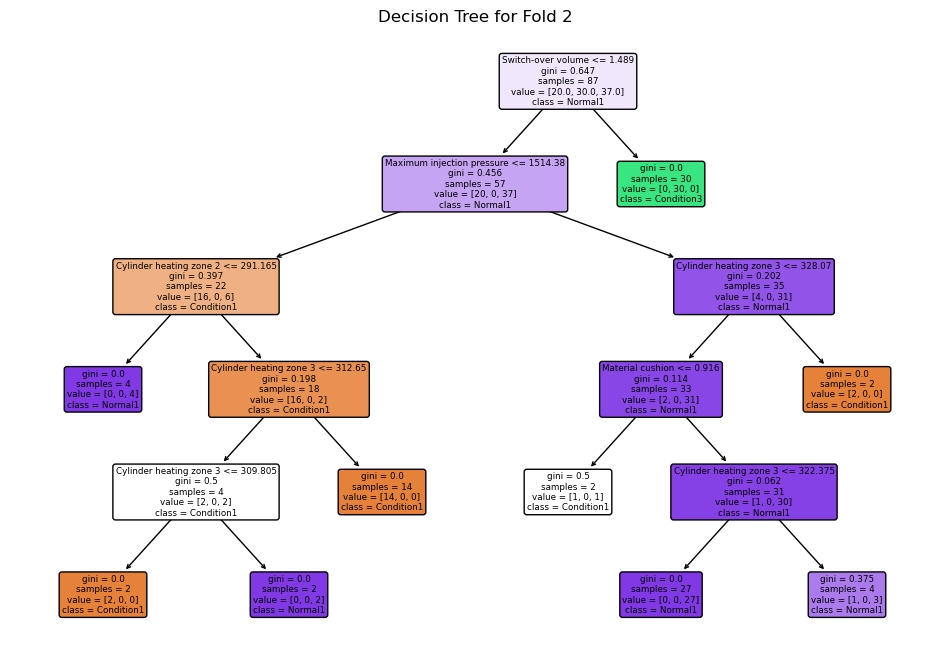

Accuracy for fold 3: 0.8276
Classification Report for fold 3:
               precision    recall  f1-score   support

  Condition1       0.62      0.71      0.67         7
  Condition3       1.00      1.00      1.00        10
     Normal1       0.82      0.75      0.78        12

    accuracy                           0.83        29
   macro avg       0.81      0.82      0.82        29
weighted avg       0.83      0.83      0.83        29



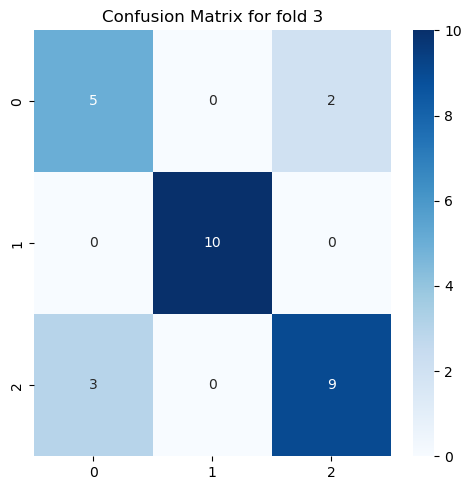

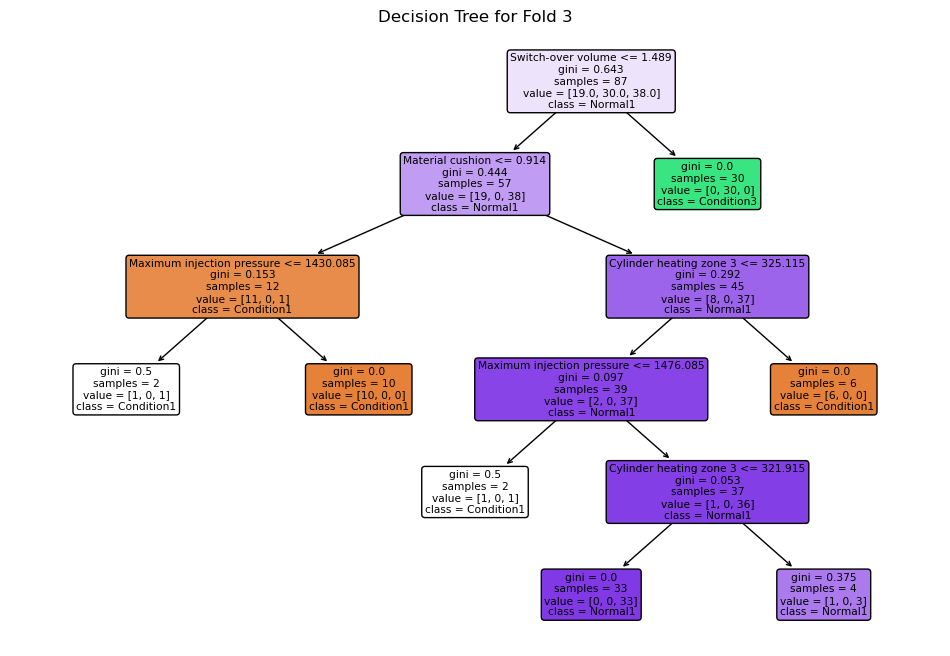

Accuracy for fold 4: 0.9655
Classification Report for fold 4:
               precision    recall  f1-score   support

  Condition1       1.00      0.86      0.92         7
  Condition3       1.00      1.00      1.00        10
     Normal1       0.92      1.00      0.96        12

    accuracy                           0.97        29
   macro avg       0.97      0.95      0.96        29
weighted avg       0.97      0.97      0.96        29



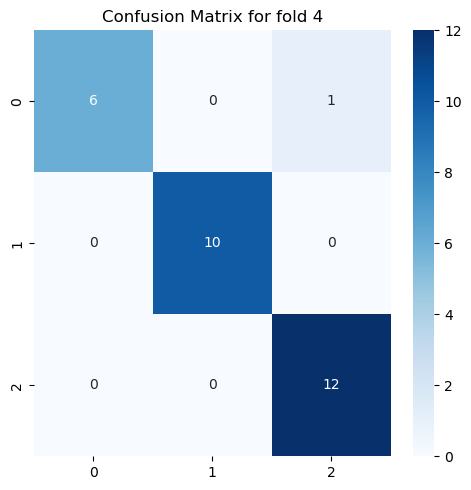

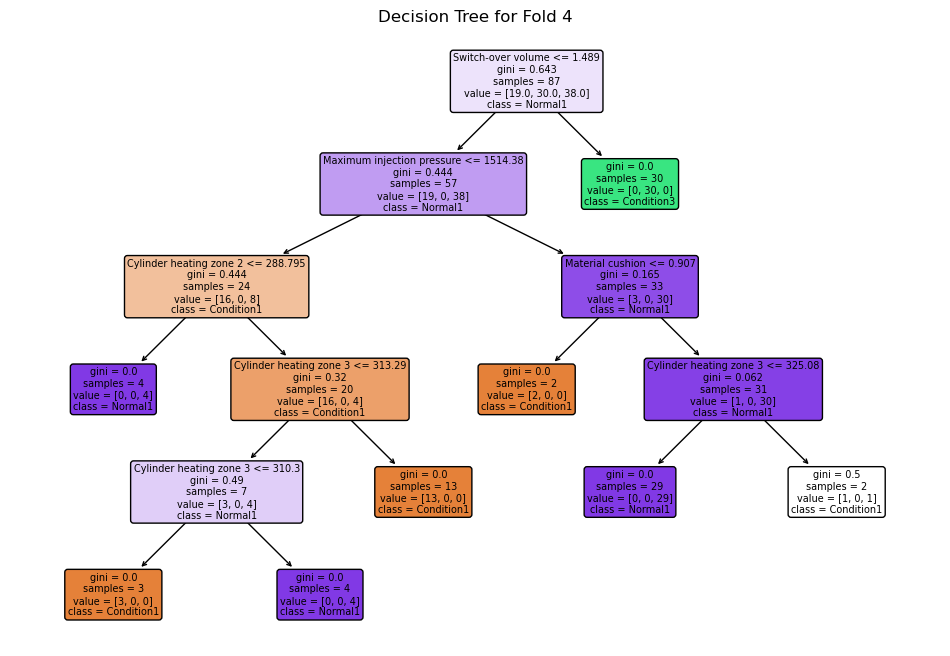

Average accuracy across folds: 0.9138


In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import StratifiedKFold as sk
from sklearn.tree import DecisionTreeClassifier as dt
from sklearn.metrics import accuracy_score as acs, confusion_matrix, classification_report
from sklearn import tree

# Load your data (X and y) from previous step
# Assuming X and y have already been split from the dataset

# Define decision tree model with specified hyperparameters
model_name = 'Decision Tree'
model2 = dt(criterion='gini', max_depth=5, min_samples_leaf=2, min_samples_split=2, random_state=0)

# Split data into 4 folds for training and testing using StratifiedKFold
cv = sk(n_splits=4, shuffle=True, random_state=0)

# Accuracy list for selected features
accuracy_l_selected = []

# Define a save path for results (ensure the directory exists)
savePath = r"C:\path\to\save\results"

# Ensure the directory exists, if not, create it
if not os.path.exists(savePath):
    os.makedirs(savePath)

# List to store feature importances from each fold
all_importances = []

# Perform cross-validation to calculate feature importance across all folds
for tr_i, te_i in cv.split(X, y):
    X_tr = X.iloc[tr_i]
    X_v = X.iloc[te_i]
    y_tr = y.iloc[tr_i]
    y_v = y.iloc[te_i]
    
    # Fit decision tree model with the specified hyperparameters
    model2.fit(X_tr, y_tr)
    
    # Store feature importances for this fold
    all_importances.append(model2.feature_importances_)

# Average the importances across folds
avg_importances = np.mean(all_importances, axis=0)

# Create DataFrame for averaged importances
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': avg_importances
})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot with features on the x-axis and importance on the y-axis for a vertical bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='Feature', y='Importance', data=importance_df, palette='viridis')
plt.title("Averaged Feature Importances Across Folds")
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.xticks(rotation=45, ha='right')  # Rotate feature names for better readability
plt.tight_layout()

# Add value labels on bars
for index, value in enumerate(importance_df['Importance']):
    plt.text(index, value, f"{value:.3f}", ha='center', va='bottom')

# Save the bar chart
plt.savefig(os.path.join(savePath, 'averaged_feature_importances.png'))
plt.show()

# Auto-select features with importance > 0.05 (you can change this threshold as needed)
selected_features = importance_df[importance_df['Importance'] > 0.05]['Feature'].tolist()

# Print the number of selected features
print(f"Number of selected features based on importance: {len(selected_features)}")
print("Selected features based on importance:", selected_features)

# Initialize list to track accuracy for each fold
accuracy_l_selected = []

# Perform cross-validation with the specified hyperparameters and selected features
for fold, (tr_i, te_i) in enumerate(cv.split(X[selected_features], y), 1):
    X_tr = X[selected_features].iloc[tr_i]
    X_v = X[selected_features].iloc[te_i]
    y_tr = y.iloc[tr_i]
    y_v = y.iloc[te_i]
    
    # Fit decision tree model and predict
    model2.fit(X_tr, y_tr)
    y_p = model2.predict(X_v)
    
    # Calculate accuracy
    accuracy = np.mean(acs(y_v, y_p))
    print(f"Accuracy for fold {fold}: {accuracy.round(4)}")
    accuracy_l_selected.append(accuracy)
    
    # Display classification report
    print(f"Classification Report for fold {fold}:\n", classification_report(y_v, y_p))
    
    # Use confusion matrix to compare y_v and y_p, plot and save confusion matrix
    fig, ax = plt.subplots(figsize=(5, 5))
    ax = sns.heatmap(confusion_matrix(y_v, y_p), annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for fold {fold}')
    plt.tight_layout()
    plt.savefig(os.path.join(savePath, f'confusion_matrix_selected_{fold}.png'))
    plt.show()
    
    # Plot the decision tree model for the fold
    plt.figure(figsize=(12, 8))
    tree.plot_tree(model2, filled=True, feature_names=selected_features, class_names=model2.classes_.astype(str), rounded=True)
    plt.title(f"Decision Tree for Fold {fold}")
    plt.savefig(os.path.join(savePath, f'decision_tree_fold_{fold}.png'))
    plt.show()

# Print final accuracy statistics across folds
mean_accuracy = np.mean(accuracy_l_selected)
print("Average accuracy across folds:", mean_accuracy.round(4))


In [102]:
from sklearn.model_selection import RandomizedSearchCV
import os 
import numpy as np
import pandas as pd
from sklearn import datasets
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import StratifiedKFold as sk
from sklearn.tree import DecisionTreeClassifier as dt
from sklearn.metrics import accuracy_score as acs
from sklearn import tree
from scipy.stats import randint
import time

# Load data
data = pd.read_csv("cleaneddata.csv")

# Split the data into features (X) and target (y)
# Assuming 'Condition' is the target column and the rest are features
X = data.drop(columns=['Condition'])  # Features
y = data['Condition']  # Target

# Convert X and y to DataFrames
X = pd.DataFrame(X)
y = pd.DataFrame(y)

# Print the length of the data
print("Data length:", len(y))

Data length: 116


In [114]:
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold as sk, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier as dt
from sklearn.metrics import accuracy_score as acs
from scipy.stats import randint

# Load your data (X and y) from previous step
# Assuming X and y have already been split from the dataset

# Define decision tree model
model_name = 'Decision Tree'
model2 = dt(random_state=0)

# Define hyperparameter space for RandomizedSearchCV
model_params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': randint(1, 50),  # Randomized range for max_depth
    'min_samples_split': randint(2, 50),  # Randomized range for min_samples_split
    'min_samples_leaf': randint(1, 50)  # Randomized range for min_samples_leaf
}

# Setup 4-fold cross-validation
cv = sk(n_splits=4, shuffle=True, random_state=0)

# Initialize RandomizedSearchCV to find the best hyperparameters
random_search = RandomizedSearchCV(estimator=model2, param_distributions=model_params, n_iter=100, cv=cv, random_state=0, n_jobs=-1)

# Perform the hyperparameter tuning on the entire dataset (you may want to use X[selected_features] if you've already selected features)
random_search.fit(X, y)

# Display only the best hyperparameters found
print("Best Hyperparameters found using RandomizedSearchCV:")
print(random_search.best_params_)


Best Hyperparameters found using RandomizedSearchCV:
{'criterion': 'gini', 'max_depth': 48, 'min_samples_leaf': 1, 'min_samples_split': 5}


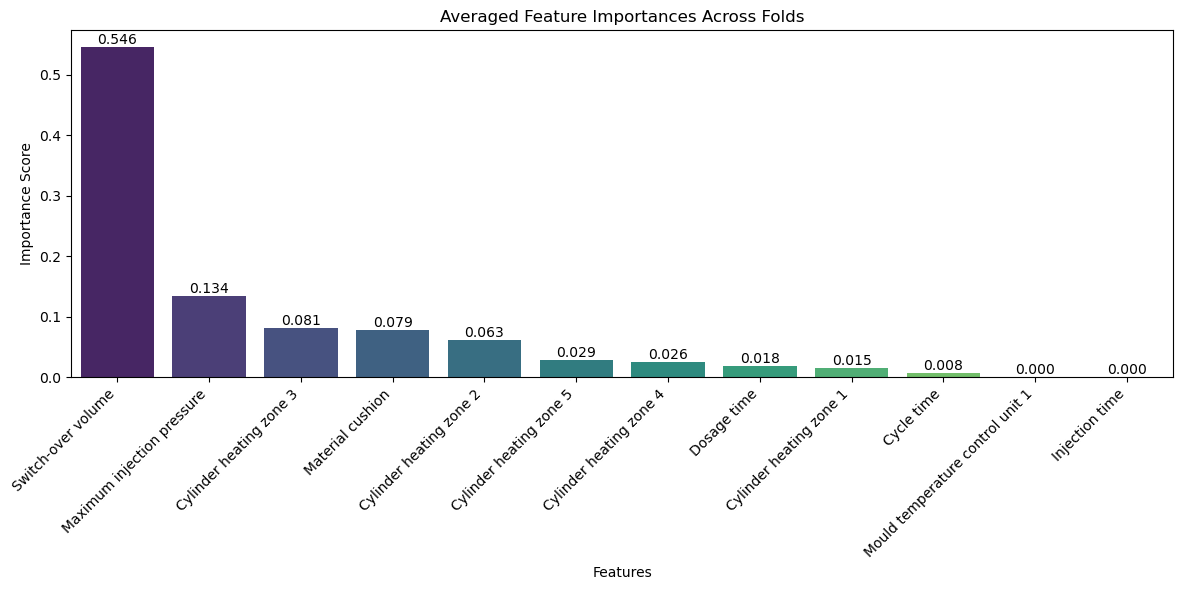

Number of selected features based on importance: 5
Selected features based on importance: ['Switch-over volume', 'Maximum injection pressure', 'Cylinder heating zone 3', 'Material cushion', 'Cylinder heating zone 2']
Accuracy for fold 1: 0.8966
Classification Report for fold 1:
               precision    recall  f1-score   support

  Condition1       0.71      0.83      0.77         6
  Condition3       1.00      1.00      1.00        10
     Normal1       0.92      0.85      0.88        13

    accuracy                           0.90        29
   macro avg       0.88      0.89      0.88        29
weighted avg       0.90      0.90      0.90        29



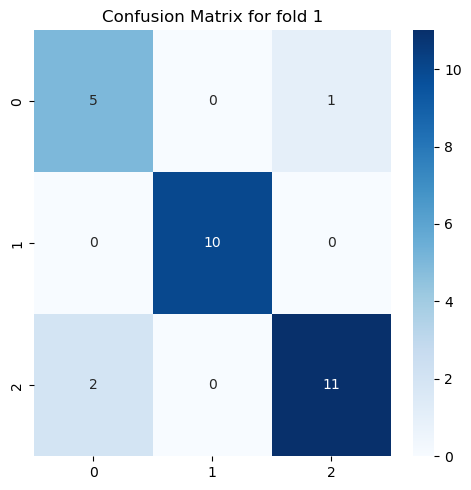

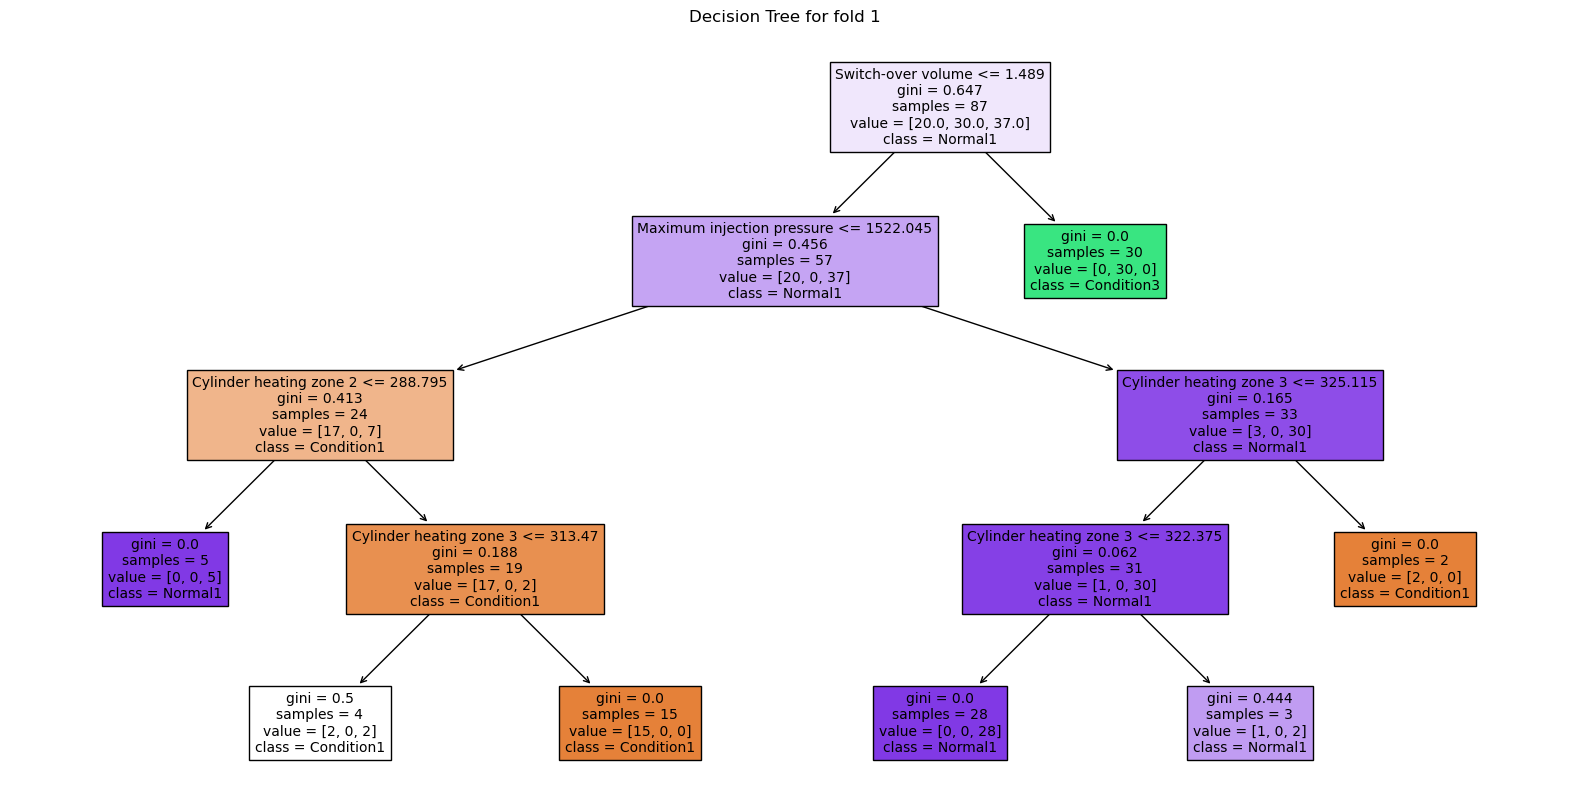

Accuracy for fold 2: 0.8621
Classification Report for fold 2:
               precision    recall  f1-score   support

  Condition1       0.75      0.50      0.60         6
  Condition3       1.00      1.00      1.00        10
     Normal1       0.80      0.92      0.86        13

    accuracy                           0.86        29
   macro avg       0.85      0.81      0.82        29
weighted avg       0.86      0.86      0.85        29



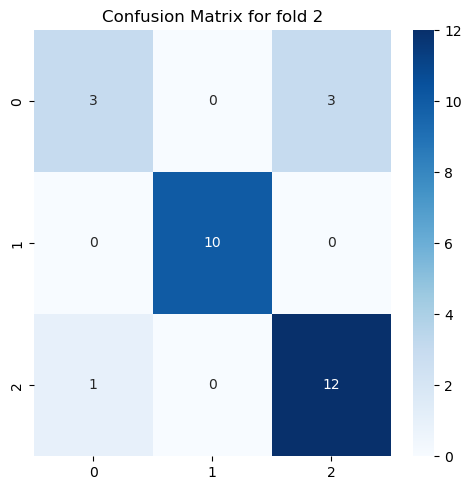

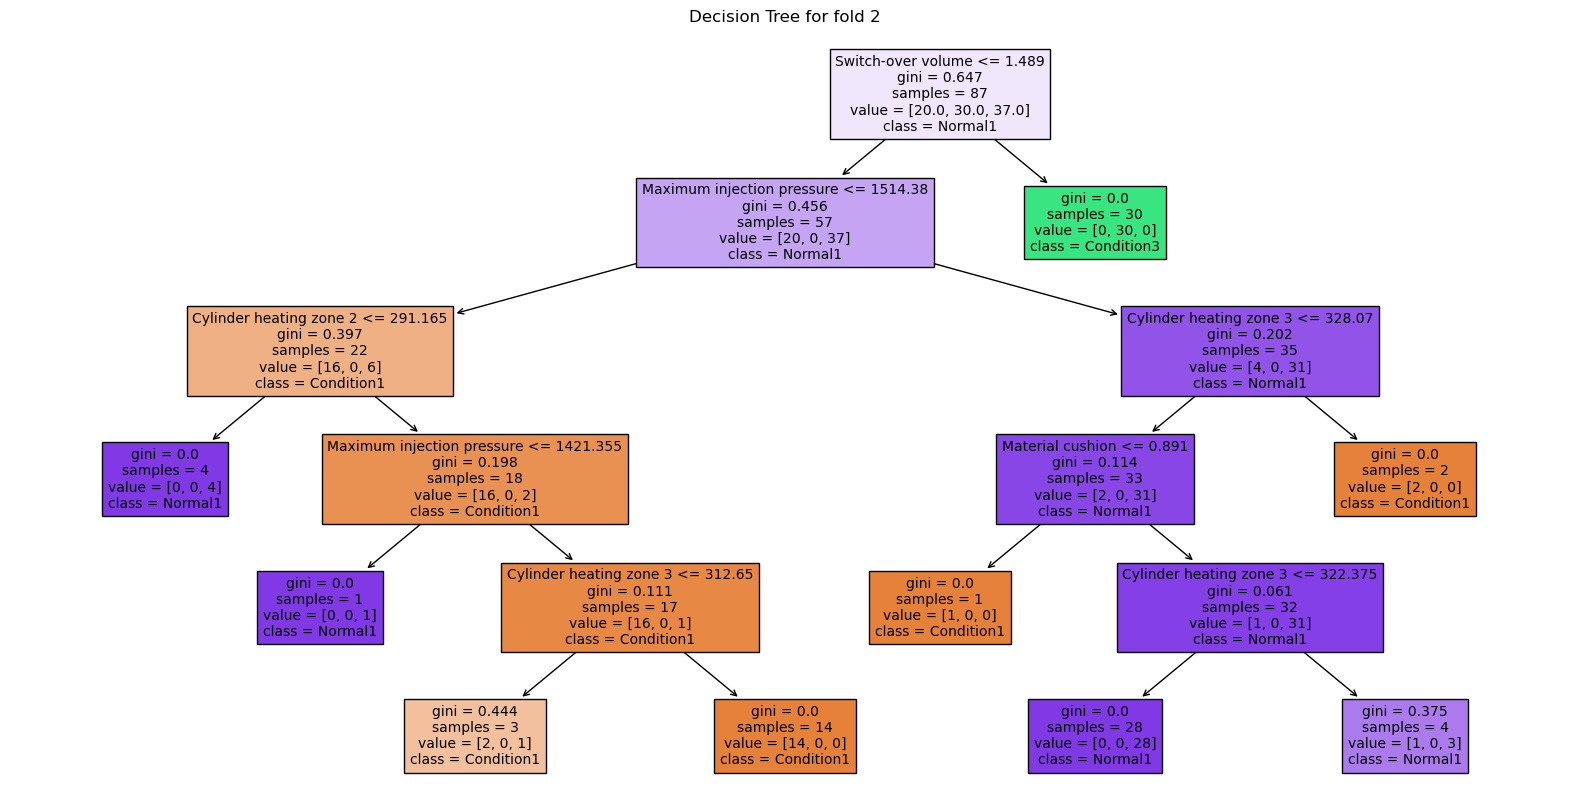

Accuracy for fold 3: 0.7586
Classification Report for fold 3:
               precision    recall  f1-score   support

  Condition1       0.50      0.71      0.59         7
  Condition3       1.00      1.00      1.00        10
     Normal1       0.78      0.58      0.67        12

    accuracy                           0.76        29
   macro avg       0.76      0.77      0.75        29
weighted avg       0.79      0.76      0.76        29



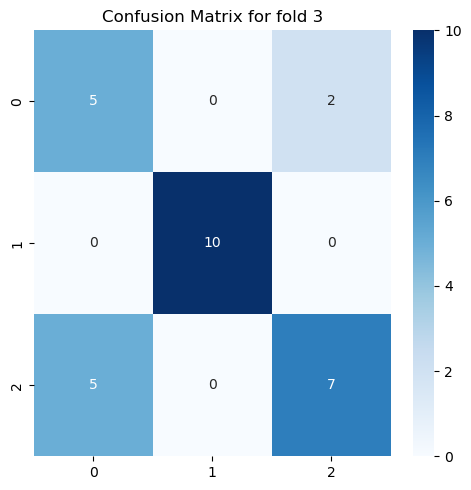

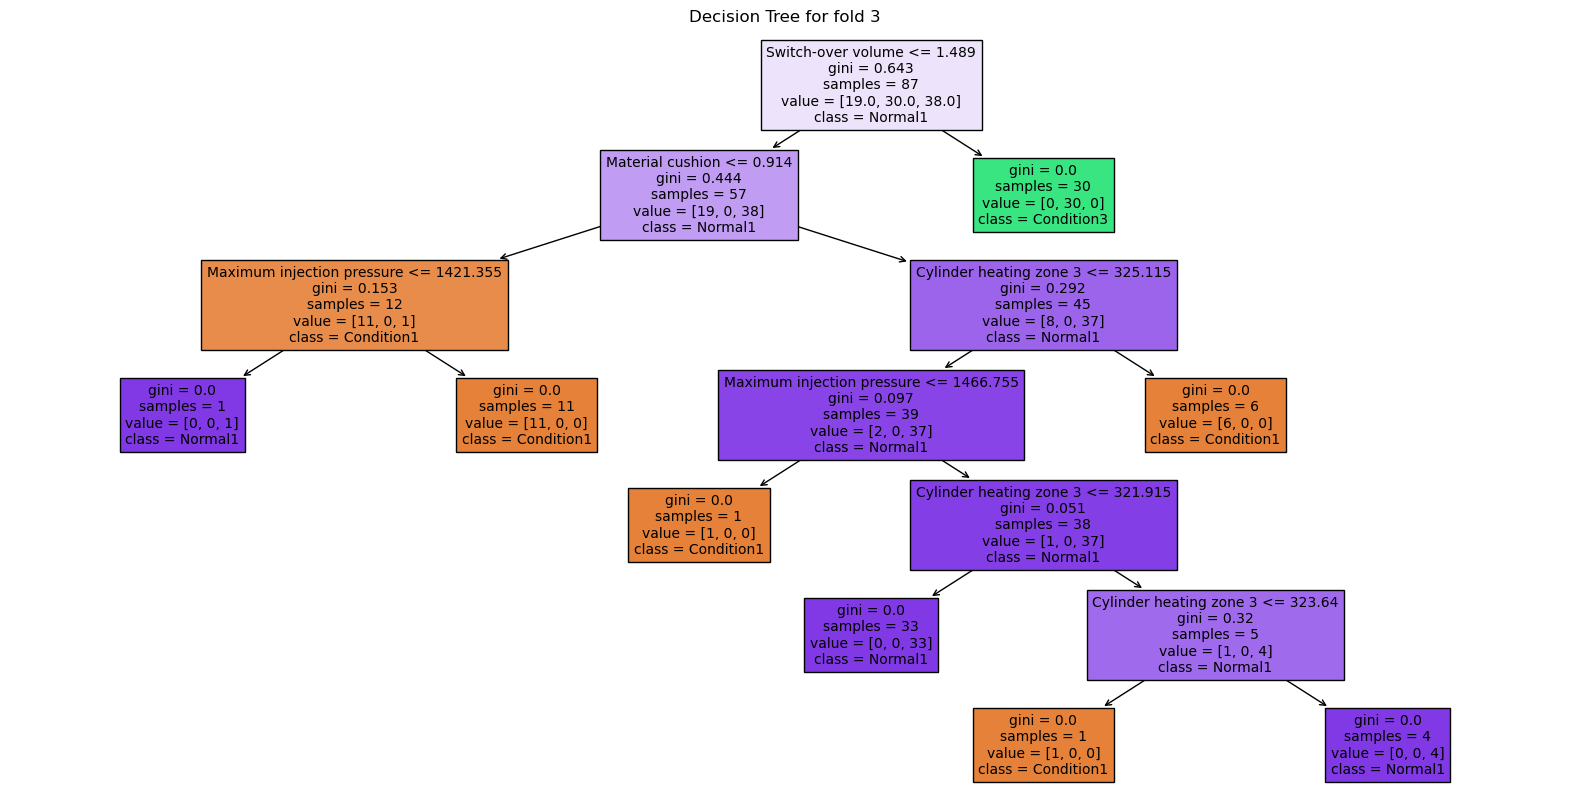

Accuracy for fold 4: 0.9655
Classification Report for fold 4:
               precision    recall  f1-score   support

  Condition1       1.00      0.86      0.92         7
  Condition3       1.00      1.00      1.00        10
     Normal1       0.92      1.00      0.96        12

    accuracy                           0.97        29
   macro avg       0.97      0.95      0.96        29
weighted avg       0.97      0.97      0.96        29



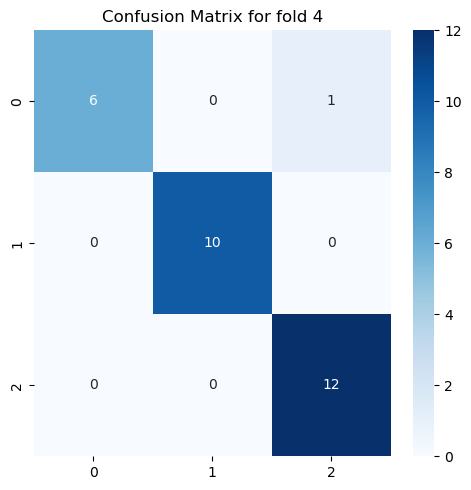

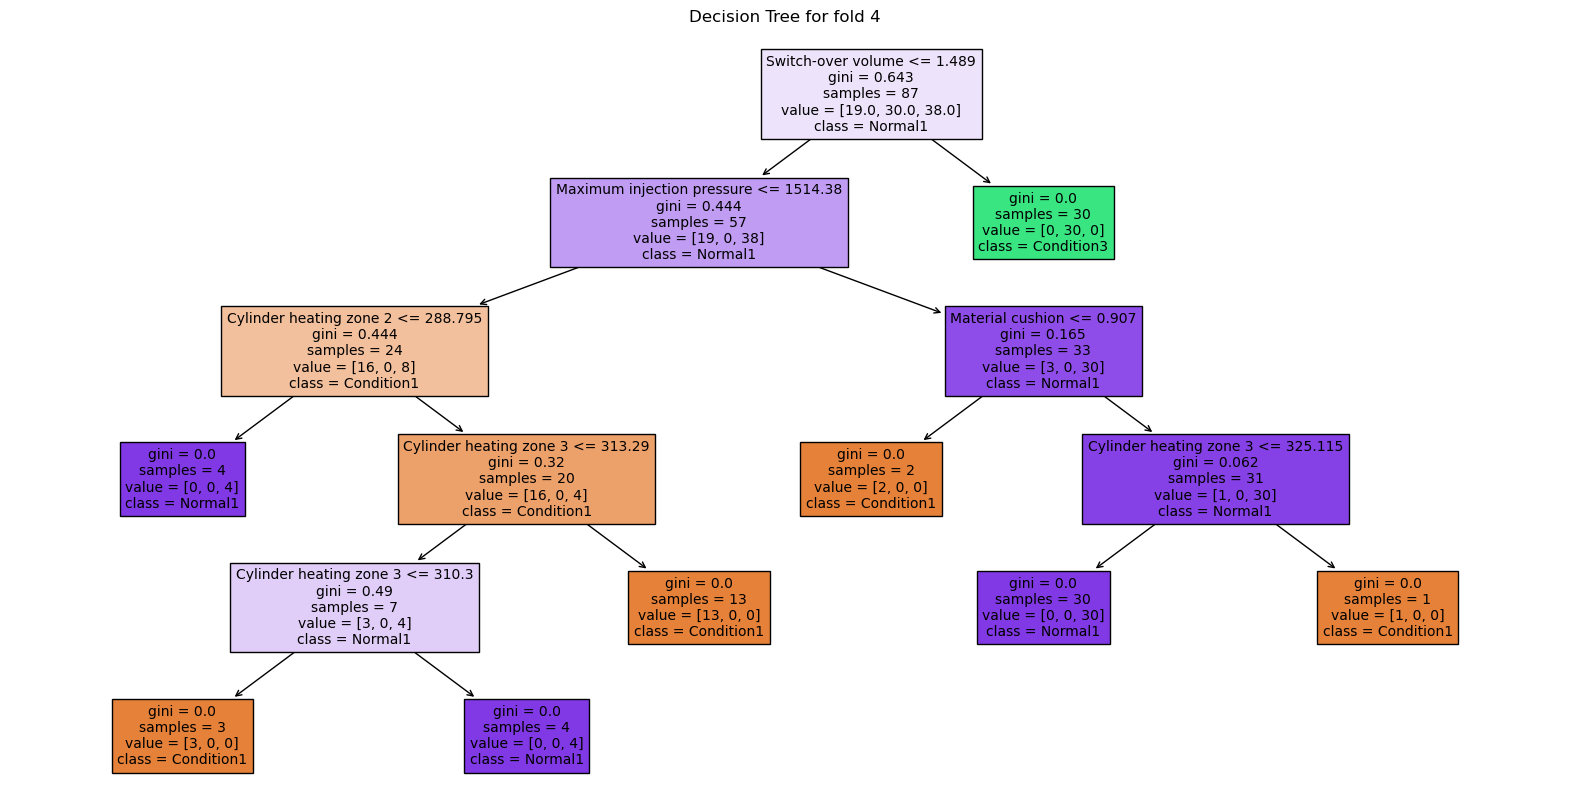

Average accuracy across folds: 0.8707


In [118]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import time
from sklearn.model_selection import StratifiedKFold as sk
from sklearn.tree import DecisionTreeClassifier as dt
from sklearn.metrics import accuracy_score as acs, confusion_matrix, classification_report
from sklearn import tree

# Load your data (X and y) from previous step
# Assuming X and y have already been split from the dataset

# Define decision model with best hyperparameters from RandomizedSearchCV
model_name = 'Decision Tree'
model2 = dt(criterion='gini', max_depth=48, min_samples_leaf=1, min_samples_split=5, random_state=0)

# Split data into 4-fold cross-validation
cv = sk(n_splits=4, shuffle=True, random_state=0)

# Accuracy list for selected features
accuracy_l_selected = []

# List to store feature importances from each fold
all_importances = []

# Define a save path for results (ensure the directory exists)
savePath = r"C:\path\to\save\results"

# Ensure the directory exists, if not, create it
if not os.path.exists(savePath):
    os.makedirs(savePath)

# Perform cross-validation to calculate feature importance across all folds
for tr_i, te_i in cv.split(X, y):
    X_tr = X.iloc[tr_i]
    X_v = X.iloc[te_i]
    y_tr = y.iloc[tr_i]
    y_v = y.iloc[te_i]
    
    # Fit decision tree model and predict
    model2.fit(X_tr, y_tr)
    
    # Store feature importances for this fold
    all_importances.append(model2.feature_importances_)

# Average the importances across folds
avg_importances = np.mean(all_importances, axis=0)

# Create DataFrame for averaged importances
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': avg_importances
})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot with features on the x-axis and importance on the y-axis for a vertical bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='Feature', y='Importance', data=importance_df, palette='viridis')
plt.title("Averaged Feature Importances Across Folds")
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.xticks(rotation=45, ha='right')  # Rotate feature names for better readability
plt.tight_layout()

# Add value labels on bars
for index, value in enumerate(importance_df['Importance']):
    plt.text(index, value, f"{value:.3f}", ha='center', va='bottom')

# Save the bar chart
plt.savefig(os.path.join(savePath, 'averaged_feature_importances.png'))
plt.show()

# Auto-select features with importance > 0.05 (you can change this threshold as needed)
selected_features = importance_df[importance_df['Importance'] > 0.05]['Feature'].tolist()

# Print the number of selected features
print(f"Number of selected features based on importance: {len(selected_features)}")
print("Selected features based on importance:", selected_features)

# Train the model with the selected features and evaluate performance
accuracy_l_selected = []
for fold, (tr_i, te_i) in enumerate(cv.split(X[selected_features], y), 1):
    X_tr = X[selected_features].iloc[tr_i]
    X_v = X[selected_features].iloc[te_i]
    y_tr = y.iloc[tr_i]
    y_v = y.iloc[te_i]
    
    # Fit decision tree model and predict
    model2.fit(X_tr, y_tr)
    y_p = model2.predict(X_v)
    
    # Calculate accuracy
    accuracy = np.mean(acs(y_v, y_p))
    print(f"Accuracy for fold {fold}: {accuracy.round(4)}")
    accuracy_l_selected.append(accuracy)
    
    # Display classification report
    print(f"Classification Report for fold {fold}:\n", classification_report(y_v, y_p))
    
    # Use confusion matrix to compare y_v and y_p, plot and save confusion matrix
    fig, ax = plt.subplots(figsize=(5, 5))
    ax = sns.heatmap(confusion_matrix(y_v, y_p), annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for fold {fold}')
    plt.tight_layout()
    plt.savefig(os.path.join(savePath, f'confusion_matrix_selected_{fold}.png'))
    plt.show()

    # Display the decision tree model
    plt.figure(figsize=(20, 10))
    tree.plot_tree(model2, filled=True, feature_names=selected_features, class_names=np.unique(y).astype(str), fontsize=10)
    plt.title(f'Decision Tree for fold {fold}')
    plt.savefig(os.path.join(savePath, f'decision_tree_fold_{fold}.png'))
    plt.show()

# Print final accuracy statistics across folds
mean_accuracy = np.mean(accuracy_l_selected)
print("Average accuracy across folds:", mean_accuracy.round(4))

